## Importa Librerie

In [7]:
# Numpy-Pandas-Matplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
%matplotlib nbagg

## Importa Dati

In [2]:
raw_data = pd.read_csv('Traces/75533_T.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)

# Drop ID column
raw_data = raw_data.drop(['id'], axis=1)
raw_data = raw_data.drop(['time'], axis=1)

# Drop header and row-index
raw_values = raw_data.values

## Rendere la serie Supervised

In [3]:
'''
# Funzione che scala le colonne aggiungendole a destra per avere il next-step
def timeseries_to_supervised(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = pd.concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df

# Pandas dataframe supervised
supervised = timeseries_to_supervised(raw_values, 1)

# Estrazione sottoforma di liste
supervised = supervised.values

# Conversione in numpy-array
supervised = np.asarray(supervised)

print('Forma dei dati: ', supervised.shape)
'''

supervised = raw_values



In [5]:
# Istanziare il modello di regressione lineare
regr = linear_model.LinearRegression()

# Dimensione della finestra di apprendimento
wnd_size = 3

# Inizializzazione liste per predizioni
pred_x = []
pred_y = []
MSE = []

# Ciclo per predizioni
for i in range(wnd_size +1, len(supervised)):

    # Creazione matrice delle posizioni precedenti -> 3x3
    mini_batch = supervised[i - wnd_size - 1 : i - 1]
    
    # Vettore contenente la posizione corrente
    new_batch = supervised[i - wnd_size : i]

    # Fit sulle 3 posizioni precedenti
    regr.fit(supervised[i - wnd_size - 1 : i - 1], supervised[i - wnd_size : i])
    
    # Predizione della posizione futura usando la posizione corrente
    pred = regr.predict(new_batch)
    #pred = pred[-1]
    print(pred)
    pred_x.append(pred[0])
    pred_y.append(pred[1])
    
    print('Posizione attuale: ', supervised[i])
    print('Posizione predetta: ', pred)
    MSE.append(mean_squared_error(pred, supervised[i]))


[[1.30631692e+04 1.32157995e+04 7.97000000e+00]
 [1.30651394e+04 1.32230775e+04 7.54000000e+00]
 [1.30669669e+04 1.32298284e+04 6.97101783e+00]]
Posizione attuale:  [1.30672010e+04 1.32306934e+04 7.90000000e+00]
Posizione predetta:  [[1.30631692e+04 1.32157995e+04 7.97000000e+00]
 [1.30651394e+04 1.32230775e+04 7.54000000e+00]
 [1.30669669e+04 1.32298284e+04 6.97101783e+00]]


ValueError: y_true and y_pred have different number of output (3!=1)

## Definizione del Modello di Regressione Lineare e finestra di Apprendimento

In [ ]:
# Istanziare il modello di regressione lineare
regr = linear_model.LinearRegression()

# Dimensione della finestra di apprendimento
wnd_size = 3

# Inizializzazione liste per predizioni
pred_x = []
pred_y = []
MSE = []

# Ciclo per predizioni
for i in range(wnd_size +1, len(supervised)):

    # Creazione matrice delle posizioni precedenti -> 3x6
    mini_batch = supervised[i - wnd_size - 1 : i - 1, :3]
    
    # Vettore contenente la posizione corrente
    new_batch = supervised[i - wnd_size : i, :3]
    
    # Fit sulle 3 posizioni precedenti
    regr.fit(mini_batch[:, :3], mini_batch[:, 3:])
    
    # Predizione della posizione futura usando la posizione corrente
    pred = regr.predict(new_batch[:, :3])
    pred = pred[-1]
    #print(pred)
    pred_x.append(pred[0])
    pred_y.append(pred[1])
    
    print('Posizione attuale: ', supervised[i, 3:])
    print('Posizione predetta: ', pred)
    MSE.append(mean_squared_error(pred, supervised[i, 3:]))
    

## Plot Animazioni

In [ ]:
raw_x = raw_values[:, 0]
raw_y = raw_values[:, 1]


fig, ax = plt.subplots()
ax.grid(True, linestyle='-', color='0.75')
xdata, ydata = [], []
    
ln, = plt.plot([], [], 'o')

def init():
    ax.set_xlim(min(raw_x), max(raw_x))
    ax.set_ylim(min(raw_y), max(raw_y))
    return ln,

def update(frame):
    # DECOMMENTARE SE SI VUOLE TENERE TRACCIA DEL PERCORSO
    '''
    xdata.append(raw_x[frame])
    ydata.append(raw_y[frame])
    ln.set_data(xdata, ydata)
    '''
    ln.set_data(raw_x[frame], raw_y[frame])
    ln.set_alpha(0.6)
    return ln,

ani = FuncAnimation(fig, update, frames=len(raw_x), interval=100, init_func=init, blit=True)
plt.show()

## Preparazione dei Dati per Animazione

In [ ]:
print(supervised[wnd_size + 1, :2])

print(pred_x[3], pred_y[3])

In [ ]:
# Voglio i dati in forma [frame, N-variabili, 2-(x, y)]

positions = np.zeros((len(pred_x)- 1, 2, 2))
counter = wnd_size + 1
print(positions.shape)

for pos in positions:

    # Posizione attuale
    pos[0] = supervised[counter, :2]
    
    # Posizione predetta
    pos[1][0] = np.array(pred_x[counter - wnd_size - 1 + 3])
    pos[1][1] = np.array(pred_y[counter - wnd_size - 1 + 3])
    counter += 1


In [ ]:
def init():
    scatterplot.set_offsets([[], []])
    return [scatterplot]

def update(i, scatterplot, positions):
    scatterplot.set_offsets(positions[i])
    scatterplot.set_color(['red', 'blue'])
    scatterplot.set_alpha(0.5)
    return [scatterplot]

fig = plt.figure()
scatterplot = plt.scatter([], [], s=10)

# Le limitazioni partono da 1 per evitare il punto iniziale (0,0)
plt.xlim(min(supervised[1:, 0]), max(supervised[1:, 0]))
plt.ylim(min(supervised[1:, 1]), max(supervised[1:, 1]))

anim = FuncAnimation(fig, update, init_func=init, fargs=(scatterplot, positions), interval=1000, frames=len(positions),
blit=True, repeat=True)
plt.show()

In [9]:
positions = np.array([[[2,2],[2,1]],[[3,3],[3,2]],[[4,4],[4,3]]])
print(positions.shape)

(3, 2, 2)


<IPython.core.display.Javascript object>


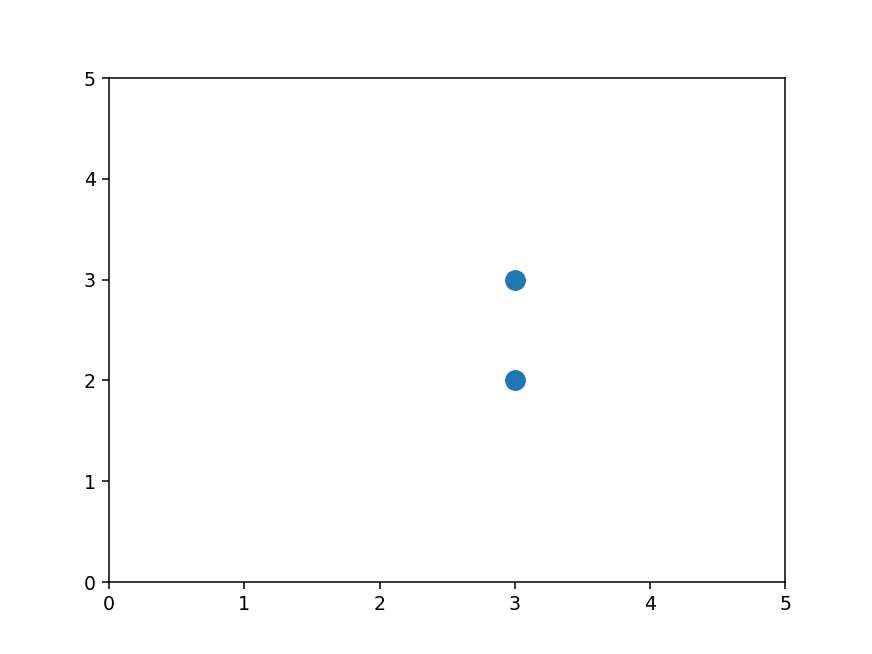

In [10]:

def init():
    scatterplot.set_offsets([[], []])
    return [scatterplot]

def update(i, scatterplot, positions):
    scatterplot.set_offsets(positions[i])
    return [scatterplot]

fig = plt.figure()

scatterplot = plt.scatter([], [], s=100)
plt.xlim(0,5)
plt.ylim(0,5)
anim = FuncAnimation(fig, update, init_func=init, fargs=(scatterplot, positions), interval=1000, frames=3,
blit=True, repeat=True)
plt.show()